# Klasterizacija na osnovu ocene putovanja

Skup podataka opisuje recenzije korisnika o različitim aspektima putovanja. Sastoji se od 24 kategorije koje su korisnici ocenjivali i jedne kolone user. Ukupan broj instanci u dataset-u je 1000. 

Cilj projekta je odrediti grupe korisnika na osnovu njihovih interesovanja.


In [2]:
import numpy as nm
import pandas as pd
from sklearn.model_selection import train_test_split
from math import pow
from sklearn import preprocessing
from numpy import savetxt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

datasetStart = pd.read_csv('travel_review.csv')

datasetStart.head()

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [3]:
shape = datasetStart.shape
print('Velicina dataseta')
print(shape)

Velicina dataseta
(1000, 25)


Najbolje ocenjene kategorije putovanja su: tržni centri, restorani i barovi, dok su najlošije ocenjene teretane, bazeni i spa centri.

<AxesSubplot:>

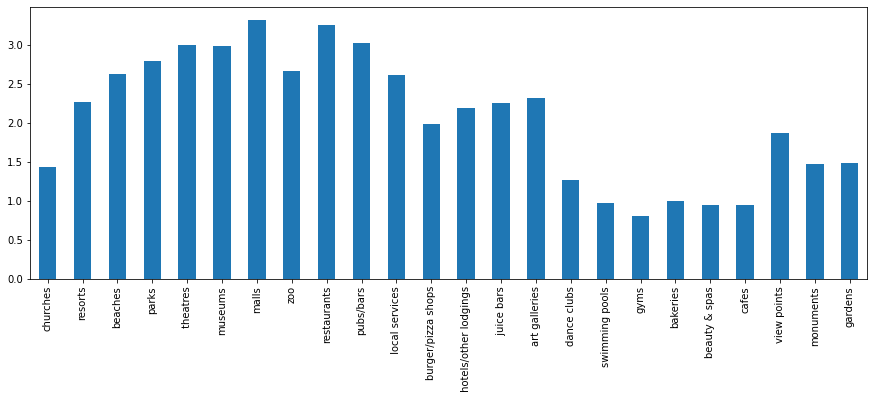

In [4]:
datasetStart[['churches','resorts','beaches','parks',' theatres','museums','malls','zoo','restaurants','pubs/bars',' local services','burger/pizza shops',' hotels/other lodgings',' juice bars','art galleries','dance clubs','swimming pools','gyms','bakeries','beauty & spas','cafes','view points','monuments','gardens']].mean().plot(figsize=(15,5),kind='bar')

## Priprema podataka i deskriptivna analiza

U skupu podataka nema nedostajućih vrednosti niti dupliranih podataka. Atributi su numeričkog tipa. Prikazana je varijansa i medijana atributa.

In [5]:
print('Nedostajuće vrednosti:')
print(datasetStart.isnull().sum())
print('Broj nedostajućih vrednosti: ', datasetStart.isnull().sum().sum())

print('\nTipovi podataka')
print(datasetStart.info())

print('\nSrednja vrednost:')
print(datasetStart.mean())
 
print('\nMedijana:')
print(datasetStart.median())

print('\nVarijansa:')
print(datasetStart.var())

print('\nDuplikati:')
print(datasetStart.duplicated().sum())

Nedostajuće vrednosti:
User                      0
churches                  0
resorts                   0
beaches                   0
parks                     0
 theatres                 0
museums                   0
malls                     0
zoo                       0
restaurants               0
pubs/bars                 0
 local services           0
burger/pizza shops        0
 hotels/other lodgings    0
 juice bars               0
art galleries             0
dance clubs               0
swimming pools            0
gyms                      0
bakeries                  0
beauty & spas             0
cafes                     0
view points               0
monuments                 0
gardens                   0
dtype: int64
Broj nedostajućih vrednosti:  0

Tipovi podataka
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0 

In [6]:
print('Deskriptivna analiza:')
datasetStart.describe()

Deskriptivna analiza:


,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.427480,2.270270,2.623870,2.798310,3.003900,2.986050,3.323080,2.670580,3.26196,...,2.320730,1.26057,0.968880,0.801590,0.992060,0.951930,0.94318,1.871830,1.474520,1.479620
std,288.819436,0.962159,1.484824,1.421287,1.306811,1.287919,1.275229,1.364708,1.154246,1.35180,...,1.781329,1.22651,1.069464,1.011709,1.314556,1.201517,0.97271,1.785745,1.381804,1.213807
min,1.000000,0.000000,0.000000,0.000000,0.830000,1.250000,1.270000,1.290000,0.890000,0.90000,...,0.510000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,250.750000,0.817500,1.260000,1.470000,1.770000,1.870000,1.887500,2.030000,1.710000,2.00000,...,0.860000,0.70000,0.580000,0.510000,0.510000,0.520000,0.54000,0.680000,0.730000,0.790000
50%,500.500000,1.285000,1.830000,2.060000,2.445000,2.695000,2.770000,2.940000,2.695000,2.88000,...,1.350000,0.80000,0.740000,0.660000,0.670000,0.665000,0.73000,1.015000,1.030000,1.220000
75%,750.250000,1.742500,2.750000,3.690000,3.772500,4.100000,4.120000,5.000000,3.240000,5.00000,...,5.000000,1.19250,0.900000,0.800000,0.860000,0.832500,0.97000,3.572500,1.400000,1.612500
max,1000.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,...,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000


In [6]:
datasetStart.skew()

User                      0.000000
churches                  1.618137
resorts                   0.759852
beaches                   0.731288
parks                     0.655810
 theatres                 0.406468
museums                   0.442639
malls                     0.077788
zoo                       0.672953
restaurants               0.174061
pubs/bars                 0.405807
 local services           0.741018
burger/pizza shops        1.579354
 hotels/other lodgings    1.131252
 juice bars               0.930716
art galleries             0.709058
dance clubs               2.409000
swimming pools            3.018784
gyms                      3.187214
bakeries                  2.349860
beauty & spas             2.503891
cafes                     2.798004
view points               0.945374
monuments                 1.676669
gardens                   1.844279
dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

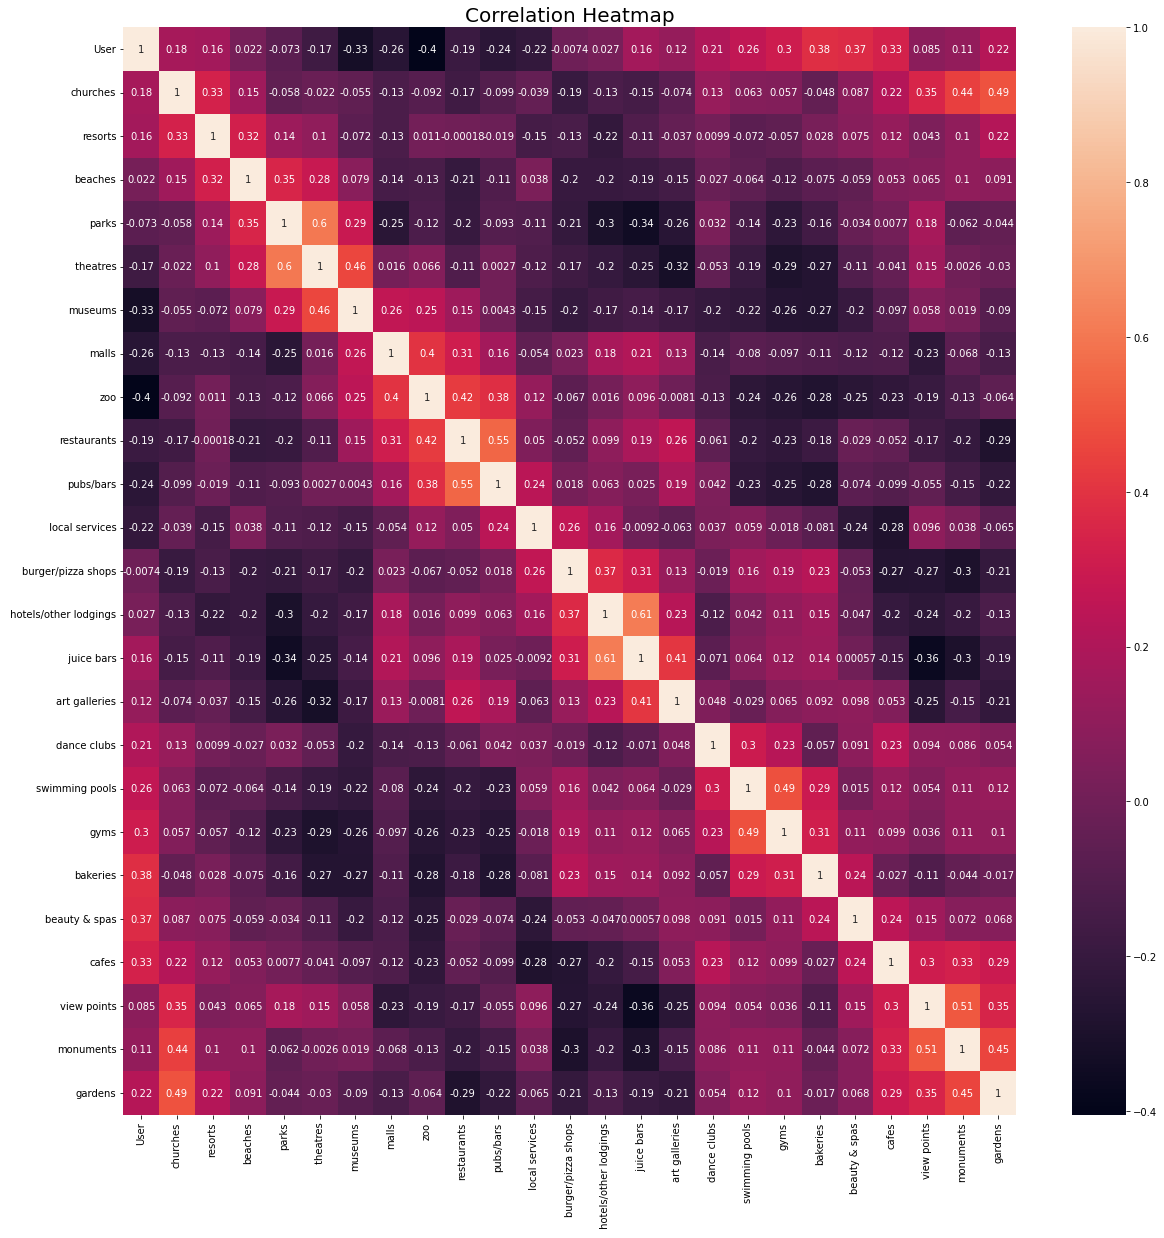

In [7]:
corr_matrix = datasetStart.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap', fontsize=20)

Podaci su uglavnom nezavisni i ne postoji jaka korelacija između atributa.

Postoji pozitivna korelacija između atributa (0.5-0.6): churches-gardens; parks-theatres; pubs/bars-restourants; juice bars-hotels; gym-swimming pools; monuuments-view points; 

Podaci u dataset-u su uglavnom simentrični i umereno simetrični. 

In [8]:
datasetStart.skew()

User                      0.000000
churches                  1.618137
resorts                   0.759852
beaches                   0.731288
parks                     0.655810
 theatres                 0.406468
museums                   0.442639
malls                     0.077788
zoo                       0.672953
restaurants               0.174061
pubs/bars                 0.405807
 local services           0.741018
burger/pizza shops        1.579354
 hotels/other lodgings    1.131252
 juice bars               0.930716
art galleries             0.709058
dance clubs               2.409000
swimming pools            3.018784
gyms                      3.187214
bakeries                  2.349860
beauty & spas             2.503891
cafes                     2.798004
view points               0.945374
monuments                 1.676669
gardens                   1.844279
dtype: float64

Izvršeno je skaliranje podatka u opsegu od 0 do 1. Skalirani podaci se nalaze u travel_review_new.csv dokumentu.

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(datasetStart.values)

# savetxt('dataSkalReviewNewData.csv', x_minmax,fmt='%.2f', delimiter=',')

# dataset = pd.read_csv('dataSkalReviewNewData.csv')
# dataset.to_csv('travel_review_new.csv', header=False)

dataset = pd.read_csv('travel_review_new.csv')
dataset.head()

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,0,0.0,0.8,0.00,1.0,1.0,1.0,1.0,1.0,1.00,...,0.67,0.79,0.49,0.53,0.7,0.52,0.64,0.0,0.0,0.0
1,1,0.0,0.8,0.00,1.0,1.0,1.0,1.0,1.0,1.00,...,0.67,0.79,0.49,0.53,0.7,0.52,0.64,0.0,0.0,0.0
2,2,0.0,0.8,0.22,1.0,1.0,1.0,1.0,1.0,0.89,...,0.67,0.79,0.49,0.53,0.7,0.52,0.64,0.0,0.0,0.0
3,3,0.0,0.8,0.00,1.0,1.0,1.0,1.0,1.0,1.00,...,0.67,0.79,0.49,0.53,0.7,0.52,0.64,0.0,0.0,0.0
4,4,0.0,0.8,0.00,1.0,1.0,1.0,1.0,1.0,1.00,...,0.67,0.79,0.49,0.53,0.7,0.52,0.64,0.0,0.0,0.0


### Provera outlier-a

Na osnovu grafika(boxplot-a) može se zaključiti da ne postoje elementi van granica odnosno outlier-i.

<AxesSubplot:>

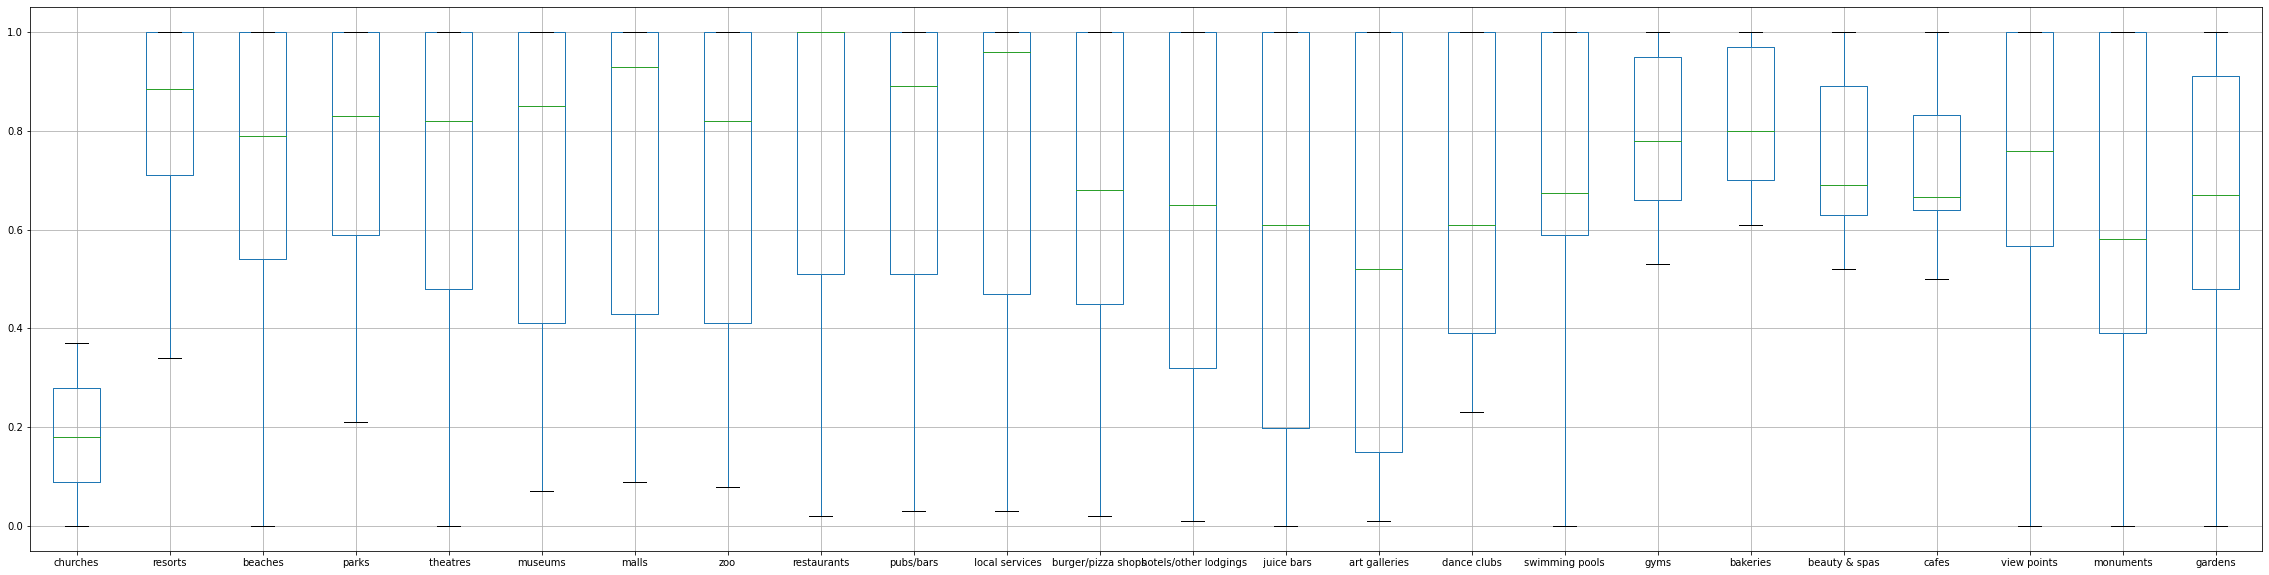

In [10]:
dfOutlier = pd.DataFrame(data = dataset, columns = ['churches','resorts','beaches','parks',' theatres','museums','malls','zoo','restaurants','pubs/bars',' local services','burger/pizza shops',' hotels/other lodgings',' juice bars','art galleries','dance clubs','swimming pools','gyms','bakeries','beauty & spas','cafes','view points','monuments','gardens'])
dfOutlier.boxplot(figsize=(40,10))

## Klasterizacija podataka (k-Means, Hierarchy clustering, DBSCAN)

Korišćenjem Elbow metode utvrđeno je da je najbolja vrednost za k jednaka 4.

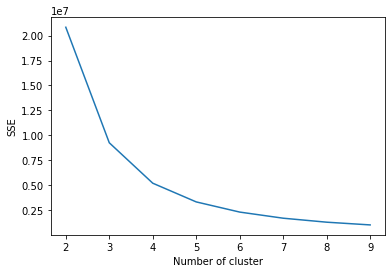

In [11]:
from sklearn.cluster import KMeans

data = dataset

sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

K-means algoritam za k=4 i k=5 bez PCA redukcije.
-Izračunavanje silhouette score,calinski harabaz score i davies bouldin score.

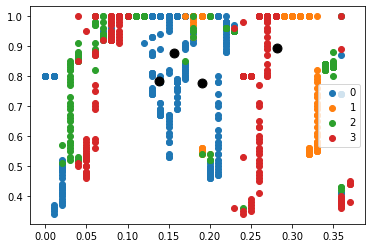

k=4
Silhouette score: 0.17277888069503006
Davies bouldin score: 1.9292255022907967
Calinski harabasz score: 178.39812853177472
Max distance: 1.36
Avg distance: 1.2
Min distance: 1.04


Text(0.5, 1.0, 'Cluster sizes')

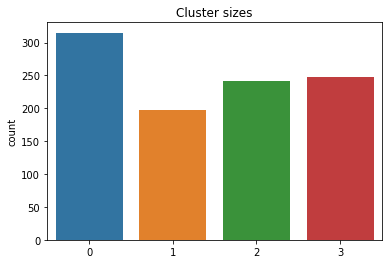

In [12]:
# k=4

from sklearn.cluster import KMeans

data = dataset.iloc[:, range(1,25)].values
    
kmeans = KMeans(n_clusters= 4)

label = kmeans.fit_predict(data)

centroids = kmeans.cluster_centers_
u_labels = nm.unique(label)

#plotting the results: 
for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

import sklearn
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics

Labels = kmeans.labels_

score_kemans_s_4 = sklearn.metrics.silhouette_score(data,Labels)
score_kemans_d_4 = davies_bouldin_score(data, Labels)
score_kemans_c_4 = metrics.calinski_harabasz_score(data, Labels)

print('k=4')
print('Silhouette score: ' + str(sklearn.metrics.silhouette_score(data,Labels)))
print('Davies bouldin score: ' + str(davies_bouldin_score(data, Labels)))
print('Calinski harabasz score: ' + str(metrics.calinski_harabasz_score(data, Labels)))

from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(kmeans.cluster_centers_).round(2)

tri_dists = dists[nm.triu_indices(3, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
print('Max distance: {}'.format(max_dist.round(2)) )
print('Avg distance: {}'.format(avg_dist.round(2)) )
print('Min distance: {}'.format(min_dist.round(2)) )

sns.countplot(x=label).set_title('Cluster sizes')

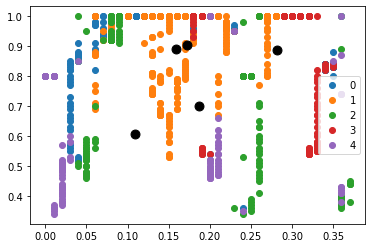

k=5
Silhouette score: 0.176986130395898
Davies bouldin score: 1.7824964460769077
Calinski harabasz score: 165.49313052416602
Max distance: 1.73
Avg distance: 1.35
Min distance: 1.11


Text(0.5, 1.0, 'Cluster sizes')

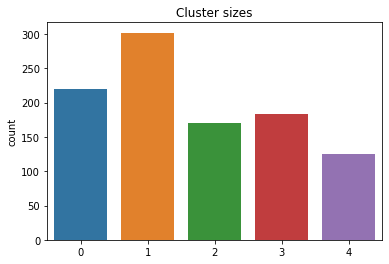

In [13]:
# k = 5
kmeans = KMeans(n_clusters= 5)
 
label = kmeans.fit_predict(data)

centroids = kmeans.cluster_centers_
u_labels = nm.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

import sklearn
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics

Labels = kmeans.labels_

score_kemans_s_5 = sklearn.metrics.silhouette_score(data,Labels)
score_kemans_d_5 = davies_bouldin_score(data, Labels)
score_kemans_c_5 = metrics.calinski_harabasz_score(data, Labels)

print('k=5')
print('Silhouette score: ' + str(sklearn.metrics.silhouette_score(data,Labels)))
print('Davies bouldin score: ' + str(davies_bouldin_score(data, Labels)))
print('Calinski harabasz score: ' + str(metrics.calinski_harabasz_score(data, Labels)))

from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(kmeans.cluster_centers_).round(2)

tri_dists = dists[nm.triu_indices(3, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
print('Max distance: {}'.format(max_dist.round(2)) )
print('Avg distance: {}'.format(avg_dist.round(2)) )
print('Min distance: {}'.format(min_dist.round(2)) )

sns.countplot(x=label).set_title('Cluster sizes')

Hijerarhijski algoritam sa 4 i 5 klastera bez PCA redukcije.

Silhouette score: 0.12494151693190751
Davies bouldin score: 1.9862229316896274
Calinski harabasz score: 148.85180763319246


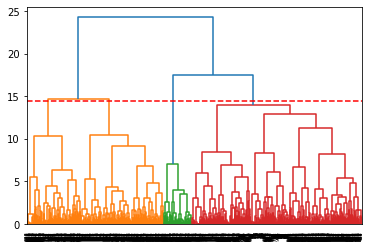

In [14]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.axhline(y=14.5, color='r', linestyle='--')

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)

Labels = hc.labels_
score_hc_s_4 = sklearn.metrics.silhouette_score(data,Labels)
score_hc_d_4 = davies_bouldin_score(data, Labels)
score_hc_c_4 = metrics.calinski_harabasz_score(data, Labels)
print('Silhouette score: ' + str(sklearn.metrics.silhouette_score(data,Labels)))
print('Davies bouldin score: ' + str(davies_bouldin_score(data, Labels)))
print('Calinski harabasz score: ' + str(metrics.calinski_harabasz_score(data, Labels))) 

Silhouette score: 0.14134408708146873
Davies bouldin score: 2.0571602551831702
Calinski harabasz score: 142.2652453388519


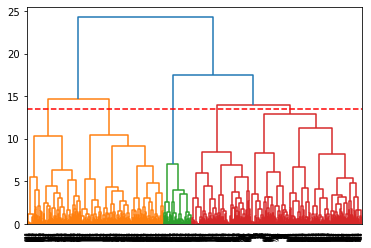

In [15]:
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.axhline(y=13.5, color='r', linestyle='--')

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)

Labels = hc.labels_
score_hc_s_5 = sklearn.metrics.silhouette_score(data,Labels)
score_hc_d_5 = davies_bouldin_score(data, Labels)
score_hc_c_5 = metrics.calinski_harabasz_score(data, Labels)
print('Silhouette score: ' + str(sklearn.metrics.silhouette_score(data,Labels)))
print('Davies bouldin score: ' + str(davies_bouldin_score(data, Labels)))
print('Calinski harabasz score: ' + str(metrics.calinski_harabasz_score(data, Labels)))

DBSCAN algoritam je dao najlošije rezultate, vrednost Silhouette score-a je negativna. Iz ovog razloga DBSCAN algoritam nije uzet u razmatranje.

Na osnovu grafika utvrđena je vrednost parametra DBSCAN algoritma epsilon i ona iznosi 0.02.

1.1287160847617974


<Figure size 360x360 with 0 Axes>

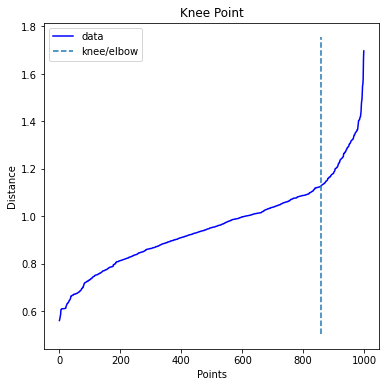

In [16]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

data = pd.read_csv('travel_review_new.csv')
data= data[data.columns[1:24]]
X=data.iloc[:1000].values 

nearest_neighbors = NearestNeighbors(n_neighbors=25)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = nm.sort(distances[:,24], axis=0)

i = nm.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Number of clusters: 2


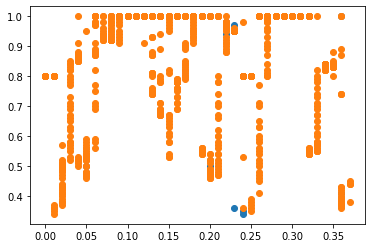

Silhouette score: 0.10352142842480445
Davies bouldin score: 4.018902378505631
Calinski harabasz score: 8.05526660917089


Text(0.5, 1.0, 'Cluster sizes')

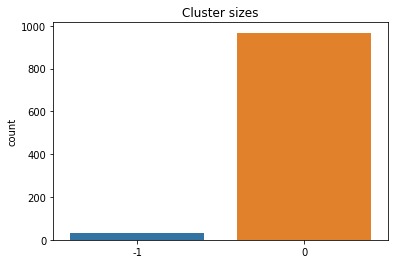

In [17]:
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

data = pd.read_csv('travel_review_new.csv')
data= data[data.columns[1:24]]
X=data.iloc[:1000].values 

model = DBSCAN(eps=1.13, min_samples=25)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
print('Number of clusters:', len(clusters))
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

score_dbscan_s_4 = sklearn.metrics.silhouette_score(X, model.labels_)
score_dbscan_d_4 = davies_bouldin_score(X, model.labels_)
score_dbscan_c_4 = metrics.calinski_harabasz_score(X, model.labels_)

#score
print('Silhouette score: ' + str(sklearn.metrics.silhouette_score(X, model.labels_)))
print('Davies bouldin score: ' + str(davies_bouldin_score(X, model.labels_)))
print('Calinski harabasz score: ' + str(metrics.calinski_harabasz_score(X, model.labels_)))

sns.countplot(x=model.labels_).set_title('Cluster sizes')

### Rezultati klasterizacije (bez redukcije atributa)

Na osnovu podataka u tabeli može se zaključiti da je k-means algoritam za k=4 klastera dao najbolje rezultate na skupu podataka bez redukcije atributa.

In [18]:
dframe=pd.DataFrame(
{
    "Algorithm" : ["K-Means (4 klastera) ","K-Means (5 klastera) ","Hierarchy (4 klastera)", "Hierarchy (5 klastera)", "DBSCAN (3 klastera)"],
    "Silhouette Score":[score_kemans_s_4,score_kemans_s_5,score_hc_s_4,score_hc_s_5, score_dbscan_s_4],
    "Calinski Harabasz Score":[score_kemans_c_4,score_kemans_c_5,score_hc_c_4,score_hc_c_5, score_dbscan_c_4],
    "Davies Bouldin Score":[score_kemans_d_4,score_kemans_d_5,score_hc_d_4, score_hc_d_5,score_dbscan_d_4],
})


dframe.head()

,Algorithm,Silhouette Score,Calinski Harabasz Score,Davies Bouldin Score
0,K-Means (4 klastera),0.172779,178.398129,1.929226
1,K-Means (5 klastera),0.176986,165.493131,1.782496
2,Hierarchy (4 klastera),0.124942,148.851808,1.986223
3,Hierarchy (5 klastera),0.141344,142.265245,2.057160
4,DBSCAN (3 klastera),0.103521,8.055267,4.018902


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

pd.set_option('display.max_columns', None)
data = pd.read_csv('travel_review_new.csv')
data= data[data.columns[1:24]]
X=data.values
kmeans = KMeans(n_clusters=4).fit(X)

df_scaled = pd.DataFrame(X)
df_scaled['cluster'] = kmeans.labels_
group = (df_scaled.loc[df_scaled[1]!=-1, :].groupby('cluster').mean())


### Klaster 0

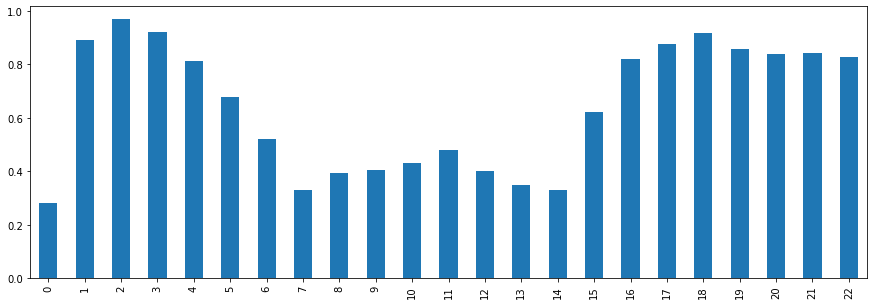

In [13]:
group.iloc[0].plot.bar(figsize=(15,5));

#### Klaster 0:
Korisnici us najbolje ocenili restorane brze hrane, hotele, kafiće, galerije, pekare, spa centre i terentane. Najniže su ocenjene crkve, muzeji, pozorišta i tržni centri. 

### Klaster 1

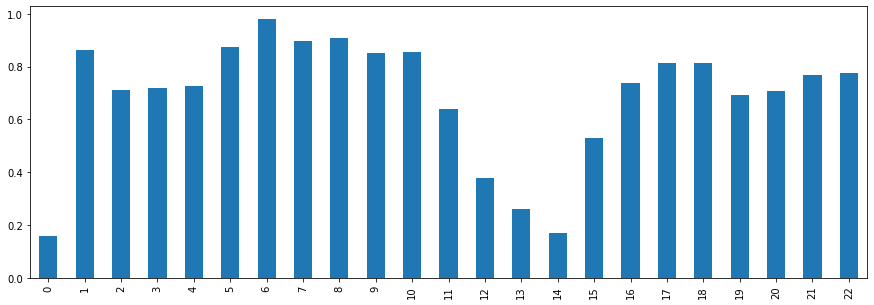

In [14]:
group.iloc[1].plot.bar(figsize=(15,5));

#### Klaster 1: 
  Korisnici koji su ocenom vecom od 4 ocenili restorane, pozorista, muzeje i tržne centre. Najnižim ocenama (ocenama 1 i 2) su ocenjene crkve, galerije, kafići i hoteli. Ostale kategorije su ocenjene ocenama u opsegu od 3 do 4.  

### Klaster 2

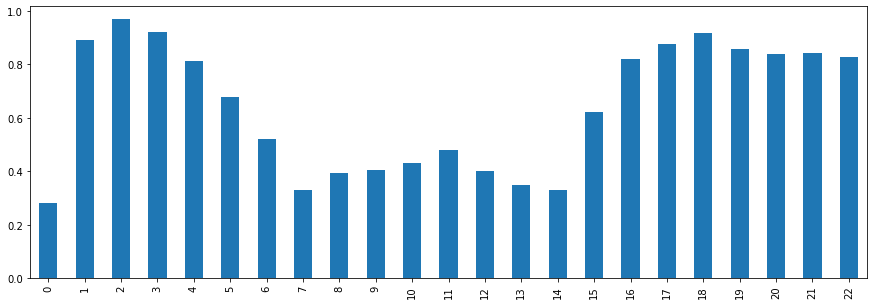

In [13]:
group.iloc[2].plot.bar(figsize=(15,5));

#### Klaster 2:
    
Korisnici koji su najbolje ocenili banje, plaže, parkove, bazene, teretane, pekare, spa centre, kafiće, vidikovce, spomenike i bašte.
Prosečne ocene ovih kategorija su između 4 i 5. Ostale kategorije su u vecinom u opsegu ocene od 1.5 do 2.5.

### Klaster 3

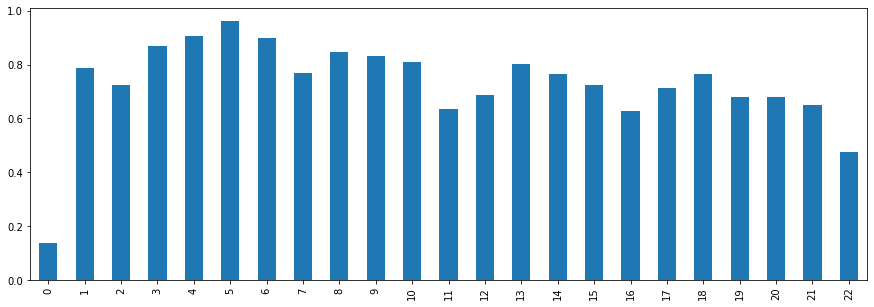

In [16]:
group.iloc[3].plot.bar(figsize=(15,5));

#### Klaster 3:
Korisnici su vecinom dali visoke i pozidtivne ocene u opsegu od 3.5 do 5. 
Medjutim, najgore su ocenjene crkve sa najnizom ocenom.
 

0-churches
1-resorts
2-beaches
3-parks
4-theatres
5-museums
6-malls
7-zoo
8-restaurants
9-pubs/bars
10- local services
11-burger/pizza shops
12-hotels/other lodgings
13-juice bars
14-art galleries
15-dance clubs
16-swimming pools
17-gyms
18-bakeries
19-beauty & spas
20-cafes
21-view points
22-monuments
23-gardens

## PCA redukcija dimenzionalnosti

Svakoj instanci su pridodate vrednosti komponenti koje su dobijene korišćenjem PCA metode kao i klaster kome korisnik pripada.

(1000, 2)

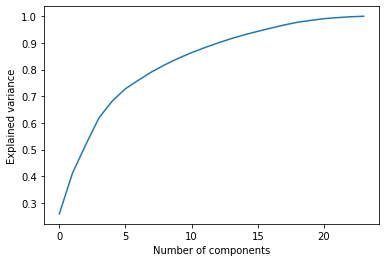

In [20]:
from sklearn.decomposition import PCA 
import numpy as np


data = dataset[dataset.columns[1:25]]

pca=PCA(n_components=24, random_state=2000)
df = pca.fit_transform(data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained variance')
plt.xlabel('Number of components')

# pca = PCA(n_components=0.90)
pca = PCA(n_components=2)
#Transform the data
df = pca.fit_transform(data)
 
df.shape
# n = pca.explained_variance_ratio_
# n.sum()

Na osnovu grafika utvrđeno je da je adekvatan broj komponenti 2.

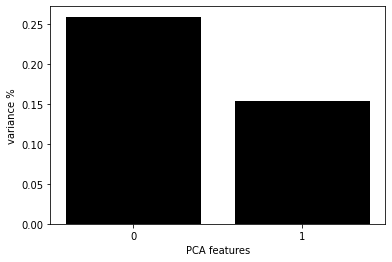

In [21]:
# broj pca komponenti

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(df)

Korišćenjem Elbow metode utvrđeno je da je najbolja vrednost za k jednaka 4 i skupu podataka sa izvršenom redukcijom dimenzionalnosti.

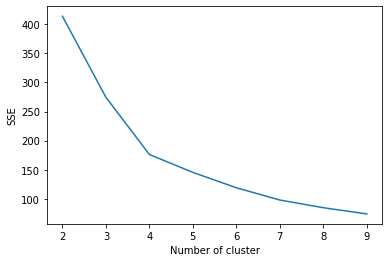

In [22]:
# Elbow Method

from sklearn.cluster import KMeans

data = df

sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.40191741992126934
For n_clusters = 3 The average silhouette_score is : 0.4036744661423681
For n_clusters = 4 The average silhouette_score is : 0.42669329809963097
For n_clusters = 5 The average silhouette_score is : 0.3928308707663606
For n_clusters = 6 The average silhouette_score is : 0.4204303994542291
For n_clusters = 7 The average silhouette_score is : 0.42292548739212305
For n_clusters = 8 The average silhouette_score is : 0.409047368861068
For n_clusters = 9 The average silhouette_score is : 0.4053717627808795


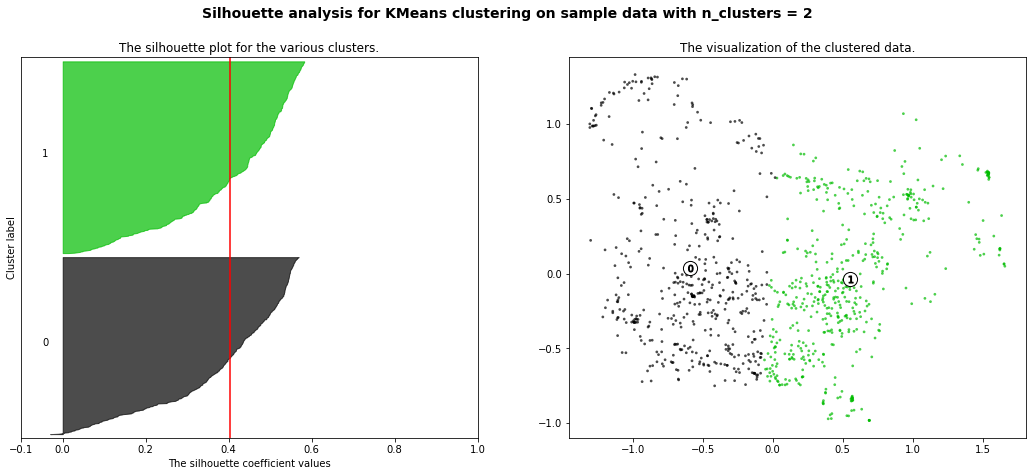

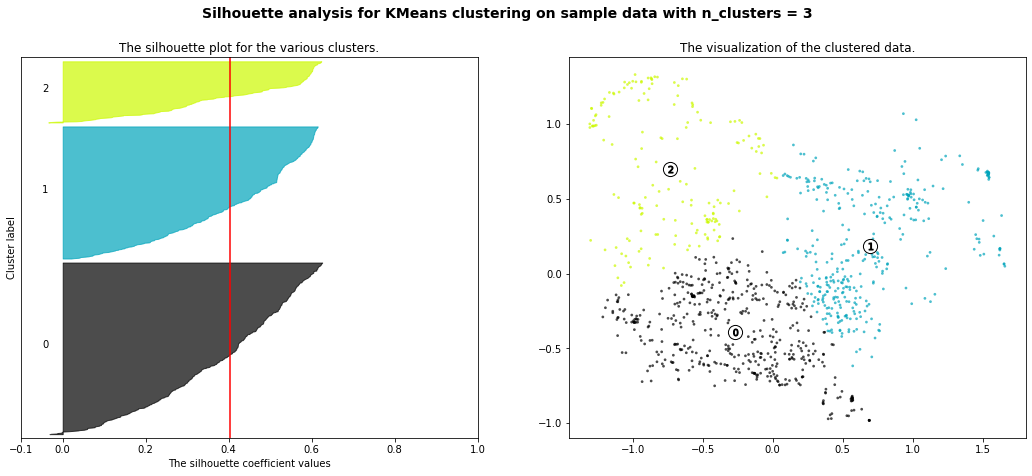

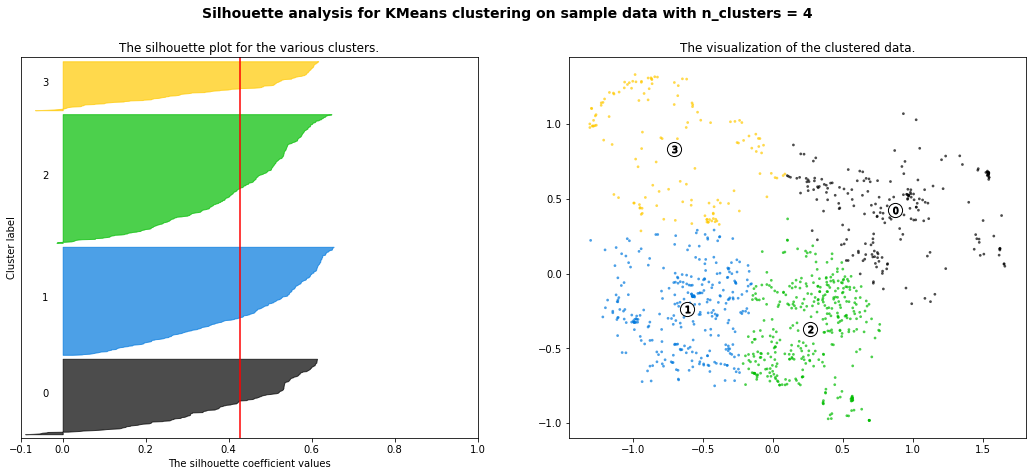

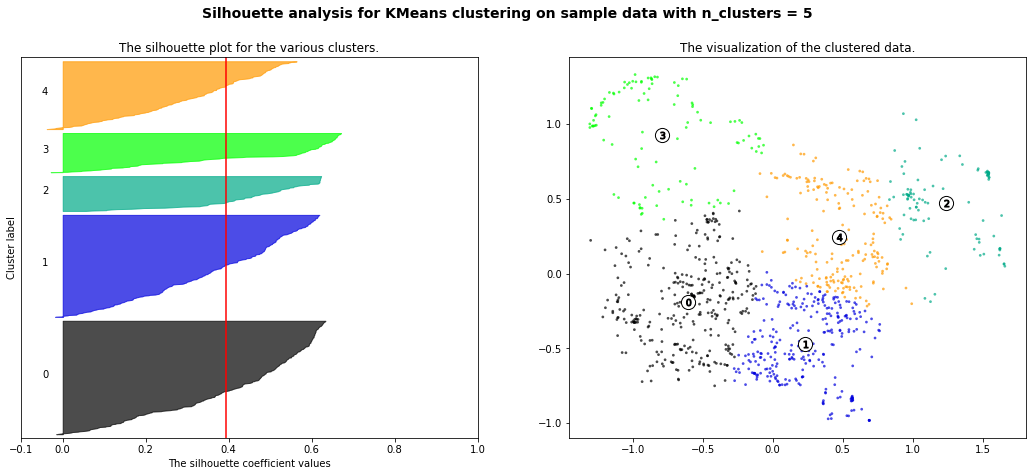

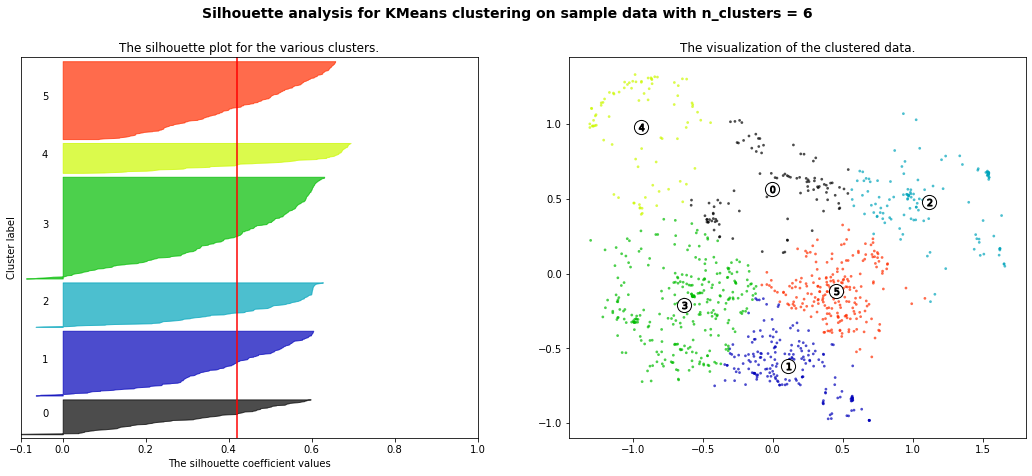

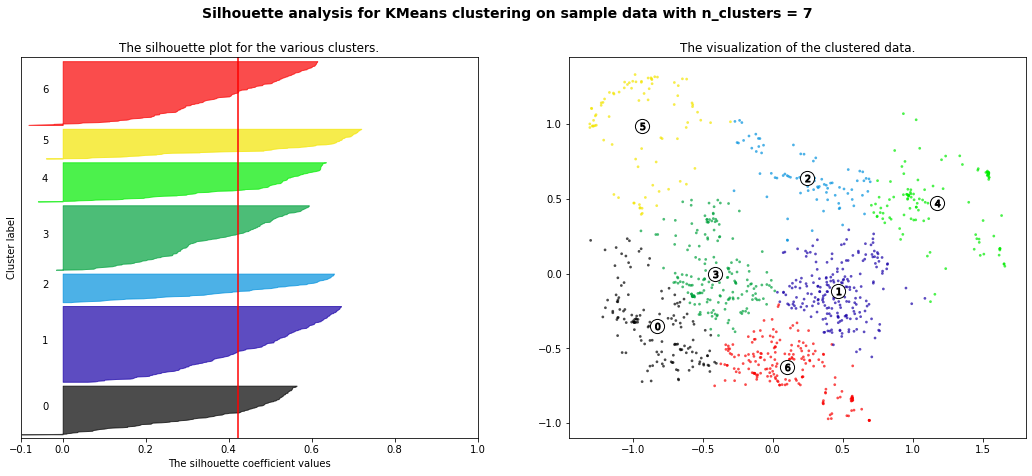

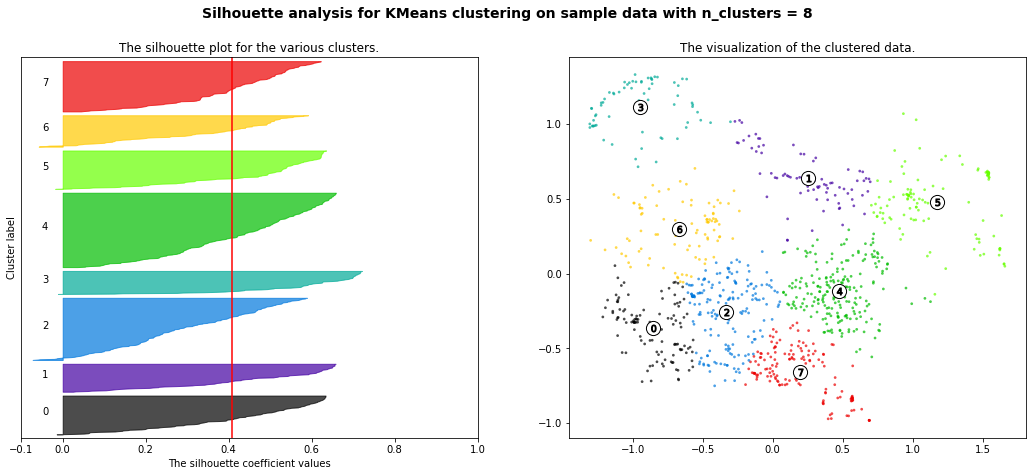

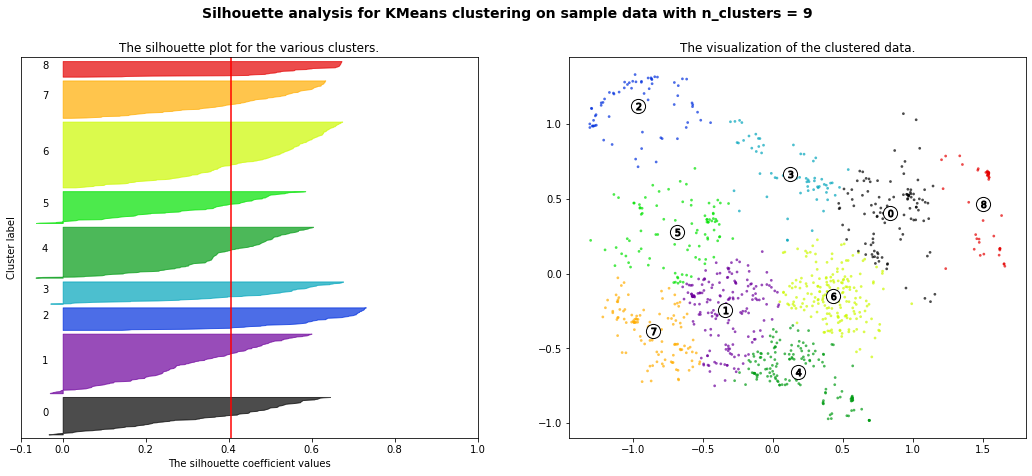

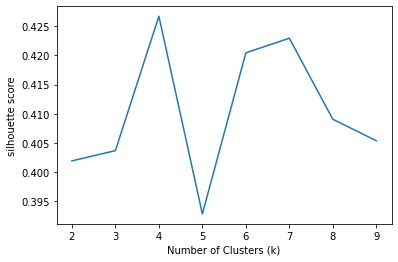

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

range_n_clusters = list(range(2, 10))
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

K-means algoritam za k=4 i k=5 sa PCA redukcijom.

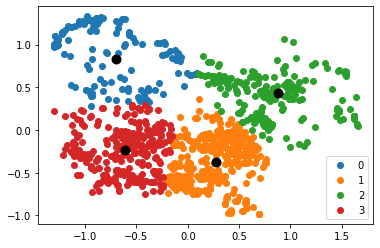

Silhouette score: 0.42669329809963097
Davies bouldin score: 0.7769834560834148
Calinski harabasz score: 1063.0842322600095
Max distance: 1.63
Avg distance: 1.39
Min distance: 1.0


In [24]:
# k=4
#Import required module
from sklearn.cluster import KMeans
    
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = nm.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

# Metrix

import sklearn
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics


Labels = kmeans.labels_
score_kmeans_s_4_pca = sklearn.metrics.silhouette_score(df, Labels)
score_kmeans_d_4_pca = davies_bouldin_score(df, Labels)
score_kmeans_c_4_pca = metrics.calinski_harabasz_score(df, Labels)

print('Silhouette score: ' + str(sklearn.metrics.silhouette_score(df,Labels)))
print('Davies bouldin score: ' + str(davies_bouldin_score(df, Labels)))
print('Calinski harabasz score: ' + str(metrics.calinski_harabasz_score(df, Labels)))


from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(kmeans.cluster_centers_).round(2)

tri_dists = dists[nm.triu_indices(3, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
print('Max distance: {}'.format(max_dist.round(2)) )
print('Avg distance: {}'.format(avg_dist.round(2)) )
print('Min distance: {}'.format(min_dist.round(2)) )




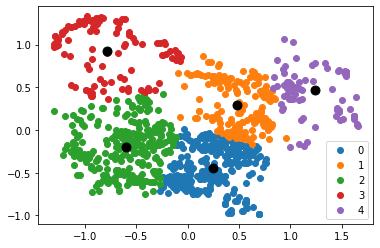

Silhouette score: 0.3961979070493336
Davies bouldin score: 0.8228083309614689
Calinski harabasz score: 1019.3314450081548
Max distance: 1.19
Avg distance: 0.95
Min distance: 0.77


In [25]:
# k=5

kmeans = KMeans(n_clusters= 5)
label = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
u_labels = nm.unique(label)

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()


Labels = kmeans.labels_
score_kmeans_s_5_pca = sklearn.metrics.silhouette_score(df, Labels)
score_kmeans_d_5_pca = davies_bouldin_score(df, Labels)
score_kmeans_c_5_pca = metrics.calinski_harabasz_score(df, Labels)

print('Silhouette score: ' + str(sklearn.metrics.silhouette_score(df,Labels)))
print('Davies bouldin score: ' + str(davies_bouldin_score(df, Labels)))
print('Calinski harabasz score: ' + str(metrics.calinski_harabasz_score(df, Labels)))


from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(kmeans.cluster_centers_).round(2)

tri_dists = dists[nm.triu_indices(3, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
print('Max distance: {}'.format(max_dist.round(2)) )
print('Avg distance: {}'.format(avg_dist.round(2)) )
print('Min distance: {}'.format(min_dist.round(2)) )

# Hijerarhijski algoritam  sa PCA redukcijom.

Silhouette score: 0.34822728897078503
Davies bouldin score: 0.8348350003027765
Calinski harabasz score: 767.8210016561351


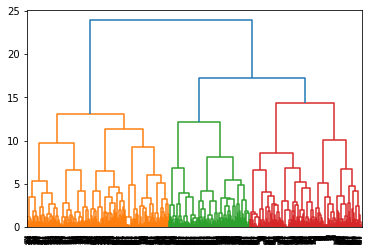

In [26]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df)

Labels = hc.labels_

score_hc_s_4_pca = sklearn.metrics.silhouette_score(df, Labels)
score_hc_d_4_pca = davies_bouldin_score(df, Labels)
score_hc_c_4_pca = metrics.calinski_harabasz_score(df, Labels)

print('Silhouette score: ' + str(sklearn.metrics.silhouette_score(df,Labels)))
print('Davies bouldin score: ' + str(davies_bouldin_score(df, Labels)))
print('Calinski harabasz score: ' + str(metrics.calinski_harabasz_score(df, Labels)))

Silhouette score: 0.3617790016936253
Davies bouldin score: 0.8723654661179095
Calinski harabasz score: 863.8421795118536


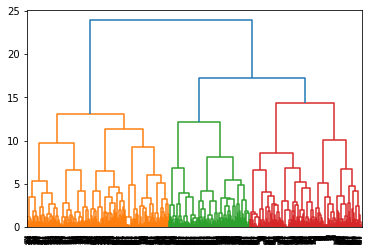

In [27]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df)

Labels = hc.labels_

score_hc_s_5_pca = sklearn.metrics.silhouette_score(df, Labels)
score_hc_d_5_pca = davies_bouldin_score(df, Labels)
score_hc_c_5_pca = metrics.calinski_harabasz_score(df, Labels)

print('Silhouette score: ' + str(sklearn.metrics.silhouette_score(df,Labels)))
print('Davies bouldin score: ' + str(davies_bouldin_score(df, Labels)))
print('Calinski harabasz score: ' + str(metrics.calinski_harabasz_score(df, Labels)))

DBSCAN algoritam je dao najlošije rezultate i primenom na dataset-u sa redukcijom dimenzionalnosti. Iz ovog razloga nije korišćen u analizi rezultata klastera.

In [28]:
# DBSCAN

# data = pd.read_csv('travel_review_new.csv')
# data = data[data.columns[1:25]]
# pca = PCA(5)
# X = pca.fit_transform(data)
 
# #def find_optimal_eps(data, nn_metric):
# neigh = NearestNeighbors(n_neighbors=2)
# nbrs = neigh.fit(X)
# distances, indices = nbrs.kneighbors(X)

# distances = nm.sort(distances, axis=0)
# distances = distances[:, 1]
# plt.figure(figsize=(5, 3))
# plt.plot(distances)
# plt.xlabel("Point index")
# plt.ylabel("Epsilon")

In [29]:
# model = DBSCAN(eps=0.25, min_samples=26)
# # fit model and predict clusters
# yhat = model.fit_predict(X)
# # retrieve unique clusters
# clusters = unique(yhat)
# print('Number of clusters:', len(clusters))
# # create scatter plot for samples from each cluster
# for cluster in clusters:
#     # get row indexes for samples with this cluster
#     row_ix = where(yhat == cluster)
#     # create scatter of these samples
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# # show the plot
# pyplot.show()

# #score

# score_dbscan_s_4_pca = sklearn.metrics.silhouette_score(df, model.labels_)
# score_dbscan_d_4_pca = davies_bouldin_score(df, model.labels_)
# score_dbscan_c_4_pca = metrics.calinski_harabasz_score(df, model.labels_)

# print('Silhouette score: ' + str(sklearn.metrics.silhouette_score(X, model.labels_)))
# print('Davies bouldin score: ' + str(davies_bouldin_score(X, model.labels_)))
# print('Calinski harabasz score: ' + str(metrics.calinski_harabasz_score(X, model.labels_)))

### Rezultati klasterizacije sa redukcijom atributa


In [30]:
dframe=pd.DataFrame(
{
    "Algorithm" : ["K-Means (4 klastera) ","K-Means (5 klastera) ","Hierarchy (4 klastera)", "Hierarchy (5 klastera)"],
    "Silhouette Score":[score_kmeans_s_4_pca,score_kmeans_s_5_pca,score_hc_s_4_pca,score_hc_s_5_pca],
    "Calinski Harabasz Score":[score_kmeans_c_4_pca,score_kmeans_c_5_pca,score_hc_c_4_pca,score_hc_c_5_pca],
    "Davies Bouldin Score":[score_kmeans_d_4_pca,score_kmeans_d_5_pca,score_hc_d_4_pca, score_hc_d_5_pca],
})


dframe.head()

,Algorithm,Silhouette Score,Calinski Harabasz Score,Davies Bouldin Score
0,K-Means (4 klastera),0.426693,1063.084232,0.776983
1,K-Means (5 klastera),0.396198,1019.331445,0.822808
2,Hierarchy (4 klastera),0.348227,767.821002,0.834835
3,Hierarchy (5 klastera),0.361779,863.842180,0.872365


Najbolje rezultate klasterizacije dao je algoritam k-Means na skupu podataka sa redukcijom dimezionalnosti primenom PCA tehnike.

In [31]:
data = pd.read_csv('travel_review_new.csv')
data = data[data.columns[1:25]]
pca = PCA(2)
X = pca.fit_transform(data)

kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(df)

df_pca_kmeans = pd.concat([data.reset_index(drop=True), pd.DataFrame(X)], axis=1)
df_pca_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2']
df_pca_kmeans['Segemtnt k means and PCA'] = kmeans.labels_

df_pca_kmeans.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services,burger/pizza shops,hotels/other lodgings,juice bars,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,Component 1,Component 2,Segemtnt k means and PCA
0,0.0,0.8,0.00,1.0,1.0,1.0,1.0,1.0,1.00,0.65,0.91,0.52,0.7,0.69,0.67,0.79,0.49,0.53,0.7,0.52,0.64,0.0,0.0,0.0,0.690928,-0.982410,3
1,0.0,0.8,0.00,1.0,1.0,1.0,1.0,1.0,1.00,0.65,0.90,0.52,0.7,0.69,0.67,0.79,0.49,0.53,0.7,0.52,0.64,0.0,0.0,0.0,0.689050,-0.980808,3
2,0.0,0.8,0.22,1.0,1.0,1.0,1.0,1.0,0.89,0.65,0.90,0.54,0.7,0.69,0.67,0.79,0.49,0.53,0.7,0.52,0.64,0.0,0.0,0.0,0.635655,-0.906794,3
3,0.0,0.8,0.00,1.0,1.0,1.0,1.0,1.0,1.00,0.65,0.90,0.52,0.7,0.69,0.67,0.79,0.49,0.53,0.7,0.52,0.64,0.0,0.0,0.0,0.689050,-0.980808,3
4,0.0,0.8,0.00,1.0,1.0,1.0,1.0,1.0,1.00,0.65,0.91,0.53,0.7,0.68,0.67,0.79,0.49,0.53,0.7,0.52,0.64,0.0,0.0,0.0,0.689612,-0.982047,3


In [32]:
df_pca_kmeans_columns = df_pca_kmeans[['churches','resorts','beaches','parks',' theatres','museums','malls','zoo','restaurants','pubs/bars',' local services','burger/pizza shops',' hotels/other lodgings',' juice bars','art galleries','dance clubs','swimming pools','gyms','bakeries','beauty & spas','cafes','view points','monuments','gardens', 'Segemtnt k means and PCA']]
                                                                                                              
group = df_pca_kmeans_columns.groupby(by="Segemtnt k means and PCA").mean()
group

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services,burger/pizza shops,hotels/other lodgings,juice bars,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
Segemtnt k means and PCA,,,,,,,,,,,,,,,,,,,,,,,,
0,0.186288,0.878629,0.816321,0.827291,0.857960,0.916555,0.954783,0.746488,0.749498,0.767191,0.735117,0.545184,0.369264,0.310134,0.268094,0.537926,0.722676,0.793010,0.798796,0.698294,0.715585,0.816555,0.786221,0.807358
1,0.213828,0.758325,0.553397,0.686411,0.389187,0.258086,0.337177,0.744928,0.701866,0.864211,0.916651,0.943828,0.937416,0.867656,0.832632,0.800335,0.737273,0.833445,0.865885,0.826507,0.729569,0.579091,0.415455,0.488900
2,0.288456,0.923015,0.979412,0.921691,0.750588,0.584779,0.378235,0.290882,0.373824,0.324485,0.432721,0.495441,0.414118,0.358824,0.329265,0.624632,0.847868,0.931103,0.959265,0.895000,0.869118,0.864191,0.856397,0.853676
3,0.123427,0.783989,0.665871,0.778652,0.776910,0.853118,0.886545,0.829775,0.930787,0.887219,0.869494,0.723848,0.698118,0.741096,0.654073,0.716348,0.657669,0.717753,0.772219,0.684101,0.678315,0.595365,0.492921,0.546601


Na grafiku su prikazane prosečne ocene korisnika po klasterima u okviru svake kategorijama. 

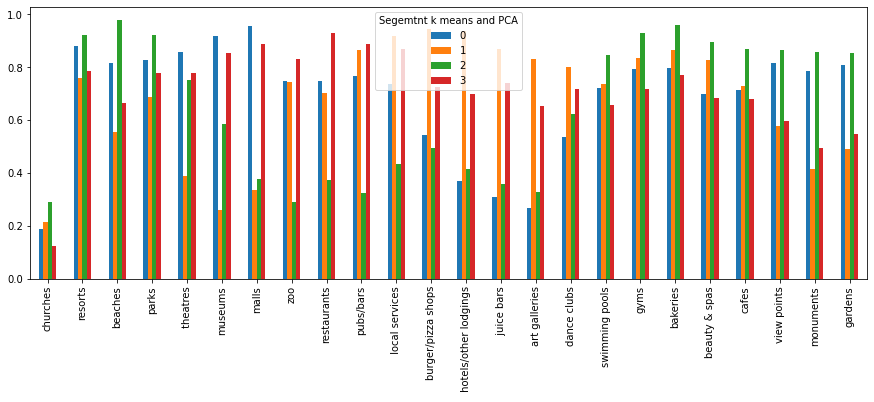

In [33]:
group_transposed = group.T
group_transposed.plot.bar(figsize=(15,5));

### Klaster 0

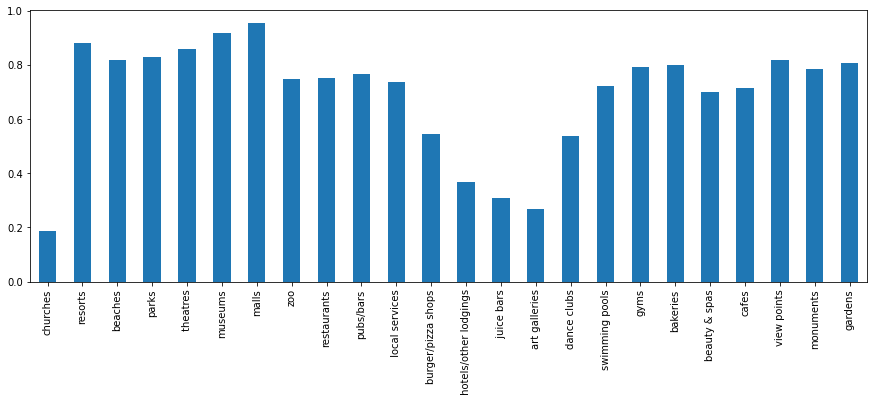

In [45]:
group.iloc[0].plot.bar(figsize=(15,5));

#### Klaster 0: 
  Korisnici koji su ocenom vecom od 4 ocenili restorane, pozorista, muzeje i tržne centre. Najnižim ocenama (ocenama 1 i 2) su ocenjene crkve, galerije, kafići i hoteli. Ostale kategorije su ocenjene ocenama u opsegu od 3 do 4.  

### Klaster 1

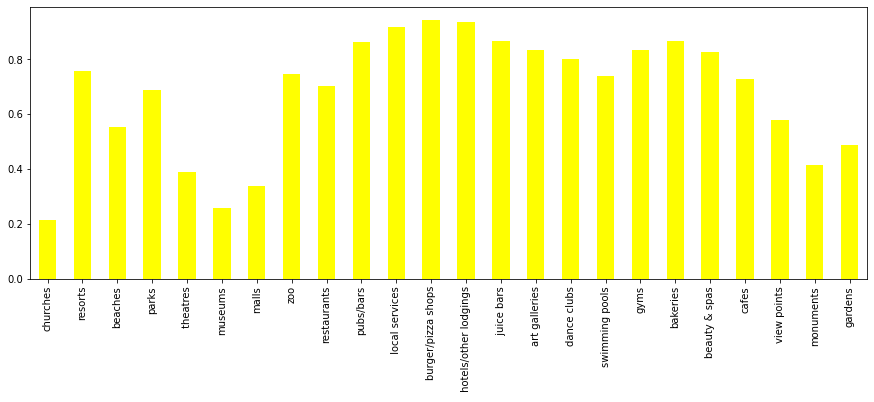

In [35]:
group.iloc[1].plot.bar(figsize=(15,5), color='yellow');

#### Klaster 1:
Korisnici us najbolje ocenili restorane brze hrane, hotele, kafiće, galerije, pekare, spa centre i terentane. Najniže su ocenjene crkve, muzeji, pozorišta i tržni centri. 

# Klaster 2

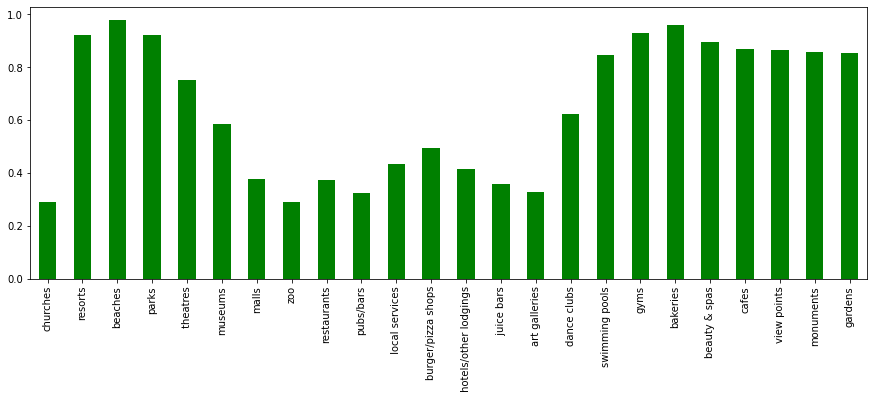

In [36]:
group.iloc[2].plot.bar(figsize=(15,5), color='green');

#### Klaster 2:
    
Korisnici koji su najbolje ocenili banje, plaže, parkove, bazene, teretane, pekare, spa centre, kafiće, vidikovce, spomenike i bašte.
Prosečne ocene ovih kategorija su između 4 i 5. Ostale kategorije su u vecinom u opsegu ocene od 1.5 do 2.5.

# Klaster 3

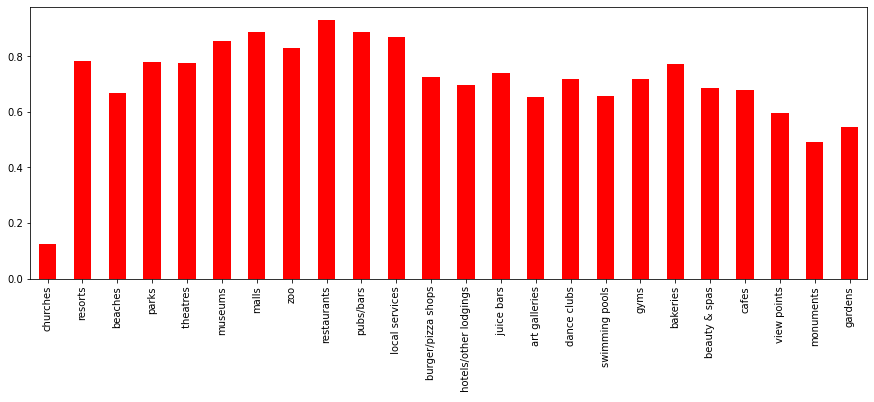

In [37]:

group.iloc[3].plot.bar(figsize=(15,5),color='red'); 

#### Klaster 3:
Korisnici su vecinom dali visoke i pozidtivne ocene u opsegu od 3.5 do 5. 
Medjutim, najgore su ocenjene crkve sa najnizom ocenom.
 

# Broj ljudi po klasterima

Broj ljudi po klasterima pikazan je na plotu. 


In [38]:
cluster0=cluster1=cluster2=cluster3=0

for i in range(0,1000):
    if (kmeans.labels_[i]==0):
        cluster0+=1
    elif (kmeans.labels_[i]==1):
        cluster1+=1
    elif (kmeans.labels_[i]==2):
        cluster2+=1
    elif (kmeans.labels_[i]==3):
        cluster3+=1
        
def graphic_all3(x1,x2,x3,x4,lab1,lab2,lab3,lab4):

    plt.bar(lab1, x1, label=lab1+':'+str(x1),color='b')
    plt.bar(lab2, x2, label=lab2+':'+str(x2), color='yellow')
    plt.bar(lab3, x3, label=lab3+':'+str(x3), color='g')
    plt.bar(lab4, x4, label=lab4+':'+str(x4), color='red')
    plt.legend()

    plt.title('Users')

    plt.show()

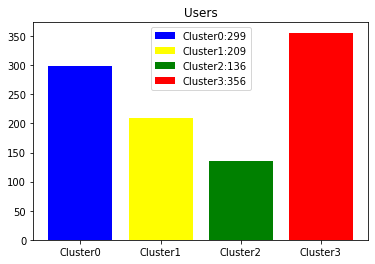

In [39]:
graphic_all3(cluster0,cluster1,cluster2,cluster3,'Cluster0','Cluster1','Cluster2','Cluster3')